In [2]:
! pip install plotly
! pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=9d0546211e472ca08ac6d96bccbc711fbc44643d632a255d66313c7ce636edc4
  Stored in directory: c:\users\bhavith shetty\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [3]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

In [5]:
pwd


'C:\\Users\\Bhavith Shetty'

In [11]:
import os
os.chdir('D:\\St Clair\\SEM 3\\303 Marketing Analytics\\Lab2')


In [12]:
pwd

'D:\\St Clair\\SEM 3\\303 Marketing Analytics\\Lab2'

In [13]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")

In [14]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [17]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
telcom = telcom.replace(" ", np.NaN)
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
missing_data = telcom.isnull()

In [20]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

In [22]:
#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [23]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [24]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [25]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [26]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [27]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [28]:
#Separating churn and non churn customers

churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [29]:
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))

Customers who stayed 5163
Customers who left 1869


In [30]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.keys().tolist()

In [31]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [32]:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [33]:
cat_cols


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [34]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [35]:
Id_col

['customerID']

In [36]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [69]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

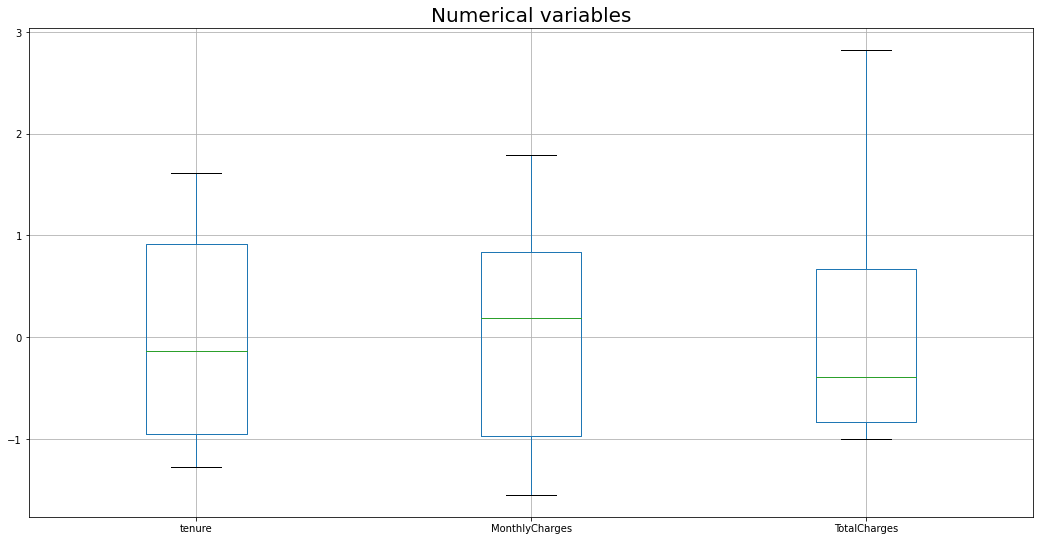

In [72]:
plt.figure(figsize=(18,9))
telcom[num_cols].boxplot()
plt.title("Numerical variables", fontsize=20)
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

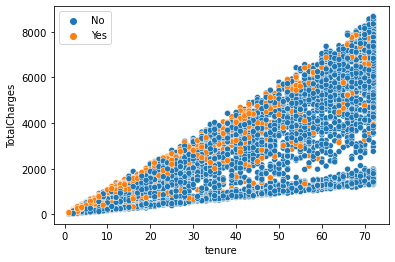

In [38]:
# Create a scatter plot

sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

Q.What does the above plot indicate?    
Ans: The strength of above plot is strong, exhibit positive correlation. With the increase in tenure their exhibits lower churn rate among the customers 

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

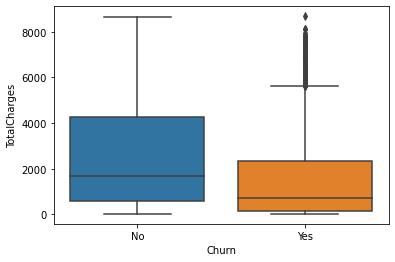

In [40]:
sns.boxplot(data= telcom, x="Churn", y="TotalCharges")

Q What does the above plot indicate?  
Ans: The above plot indicates the retention of customers till total charges reaches approx 4000, they started loose the interest with barely mininmum total cost and when total charges shoots 6000

## EDA

In [41]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

py.iplot(fig)

Comment on this distribution  
Ans : The above distribution shows the customer are loyal to the service provider/company.

In [42]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [No, Yes],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [5163, 1869]
 })]

In [43]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [44]:
# Save the cleaned file
telcom.to_csv('clean_df.csv')

## Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables

In [45]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    

In [46]:
# for all categorical columns plot pie

for i in cat_cols :
    plot_pie(i)

# . Comment on each and every chart. Is there any chart that does not make sense?

## Gender distribution in customer churn  
Ans: There is no specific categorization to visualize based on gender.
## Senior Ciizen distribution in customer churn
Ans: Senior citizen prefer to not change the services and be loyal to the brand contributing (87.1%) as their loyalty
## Partner distribution in customer churn
Ans:
## Dependents distribution in customer churn
Ans: Dependents prefer to change the services/company contributing around (82.6%)
## Phone service distribution in customer churn
Ans Both the segments prefer for the phone service distribution and their share is almost same in both the cases
## Internet service distribution in customer churn
Ans: 69.4% of churn customer segment opted for fibre optics whereas for te non churn segment the distributon is almost same without any significant worthnoting rise.
## Online security distribution in customer churn
Ans:Churn customers are more about the security systems and hence their contribution is about 84.2%
## Online backup distribution in customer churn
Ans: Both segments prefer online backup distribution whereas churn segment has highest preference with 72%
## Device protection distribution in customer churn
Ans: Both the segments seems to be inclined for this distribution but churn customers perferenece is more than the other segment
## Tech support distribution in customer churn
Ans: Churn customer segment bags the hihest share of 83.4% as compared to non churn customers
## Streaming TV distribution in customer churn
Ans: Eveidently neither both the segments are keen towards streaming TV distribution
## Streaming Movies Distribution in customer churn
Ans: Eveidently non churn customers are inclined more towards streaming movies distribution as compared to churn customers.
## Contracr distribution in customer churn
Ans: Churn customer segment prefer month to month contract distribution while non churn customer's preference distribute almost equally for month to month and two year contract distribution.
## Paperless billing in customer churn
Ans:Huge share of churn customers for this mthod of billing
## Payment method distribution in customer churn
Ans: Churn customer group prefer electronic payment method than other methods available. Whereas fo non-churn group does not show significant preferred payment method (almost equally distributed)
## Tenure group distribution in customer churn
Ans: Customer tend to switch in the first 12 months of their tenure






### Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables

In [47]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [48]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

## Comment on each and every chart. Is there any chart that does not make sense?
Ans - I am afraid there is no significant line to provide the results of the scenario.

# Scatter Plot for Numerical variables

In [49]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

In [50]:
#scatter plot matrix
scatter_matrix(telcom)

# Data Pre-Processing

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [53]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [54]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [55]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [56]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [57]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [58]:
#df_telcom_og

In [59]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [60]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,-1.158016,0.319168,-0.872095


In [61]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


In [62]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


# Variable Summary

In [63]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [65]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [67]:
#convert to array
corr_array  = np.array(correlation)

In [66]:
correlation 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.280264,0.629668,0.515709


In [68]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# Q. What do you observe?

The customer with higher tenure tend to stick to the service provider they do not opt to swtich being the senior citizn being the majority chunk in this scenario whereas churn customer tend to switch the service provider and tenure being arornd first 12 months and majority contributes to the youngster and they lack to prove loyalty to their service povider